In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [12]:
train_image_gen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,shear_range=0.2,horizontal_flip=True)
test_image_gen=ImageDataGenerator(rescale=1./255)

In [18]:
train_data = train_image_gen.flow_from_directory('dogvscat/train',batch_size=20,target_size=(150,150),class_mode = 'binary')
test_data = test_image_gen.flow_from_directory('dogvscat/test',batch_size=20,target_size=(150,150),class_mode = 'binary')

Found 500 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [23]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150,150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 17, 17, 128)     

In [25]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [26]:
history = model.fit(train_data,
                    steps_per_epoch=train_data.samples//train_data.batch_size,
                    epochs=20,
                    validation_data=test_data,
                    validation_steps=test_data.samples//test_data.batch_size)

Epoch 1/20
25/25 [==============================] - 27s 1s/step - loss: 0.7554 - accuracy: 0.5160 - val_loss: 0.6885 - val_accuracy: 0.6500
Epoch 2/20
25/25 [==============================] - 25s 997ms/step - loss: 0.6929 - accuracy: 0.5340 - val_loss: 0.6934 - val_accuracy: 0.5500
Epoch 3/20
25/25 [==============================] - 26s 1s/step - loss: 0.6724 - accuracy: 0.5980 - val_loss: 0.6972 - val_accuracy: 0.5750
Epoch 4/20
25/25 [==============================] - 27s 1s/step - loss: 0.6800 - accuracy: 0.5760 - val_loss: 0.7072 - val_accuracy: 0.5250
Epoch 5/20
25/25 [==============================] - 27s 1s/step - loss: 0.6579 - accuracy: 0.6320 - val_loss: 0.6719 - val_accuracy: 0.6250
Epoch 6/20
25/25 [==============================] - 27s 1s/step - loss: 0.6317 - accuracy: 0.6380 - val_loss: 0.7000 - val_accuracy: 0.5000
Epoch 7/20
25/25 [==============================] - 27s 1s/step - loss: 0.6087 - accuracy: 0.6940 - val_loss: 0.7378 - val_accuracy: 0.6000
Epoch 8/20
25/25 

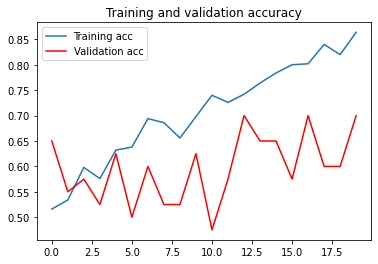

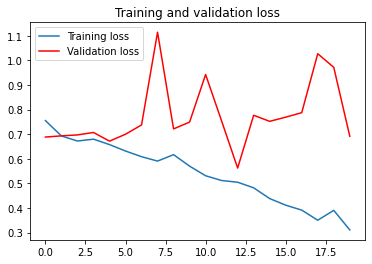

In [27]:
model.save('cats_and_dogs_small_1.h5')

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

#epochs = range(1, len(acc) + 1)

plt.plot(acc,label='Training acc')
plt.plot(val_acc,color='red',label='Validation acc')
plt.xlabel='epochs'
plt.ylabel='accuracy'
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(loss,label='Training loss')
plt.plot(val_loss,color='red',label='Validation loss')
plt.xlabel='epochs'
plt.ylabel='loss'
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [38]:
from tensorflow.keras.utils import load_img
img = tf.keras.utils.load_img('cat_or_dog_1.jpg', target_size=(150,150))
img = tf.keras.utils.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0

# Make the prediction
prediction = model.predict(img)
if prediction[0] > 0.5:
    print("Predicted: Dog")
else:
    print("Predicted: Cat")


1/1 [==============================] - 0s 40ms/step
Predicted: Cat
